In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
"Part 1 of the Mini Project"
class Neuron: #Base class
    #Represents a generic neuron with basic properties and functions common to all neuron types.
    def __init__(self, firing_rate=0):
        self.firing_rate = firing_rate #will be a common trait that all neuron will have
    def activate(self, stimulus): 
        #Receives a stimulus and calculates a firing rate based on the strength of that stimulus.
        pass #pass for later use

class SensoryNeuron(Neuron): #Intermedoate class
    #will have leaf classes (photoreceptor and mechanoreceptor)
    #A neuron that detects and responds to external stimuli. Each 
    # sensory neuron is sensitive to a specific type of stimulus, such as light or pressure.
    def __init__(self, receptor_type, firing_rate=0):
        super.__init__(firing_rate)
        self.receptor_type = receptor_type
    def sense_stimulus(self, stimulus):
        #Processes the specific stimulus it is sensitive to and activates the neuron
        #based on the strength or type of that stimulus.
        pass

class MotorNeuron(Neuron): #Intermedoate class
    #will have leaf classes (skeletal muscle and muscle spindle)
    #A neuron responsible for initiating muscle movement by sending activation signals to a target muscle.
    def __init__(self, target_muscle, firing_rate=0):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle
    def control_muscle (self, activation_level):
        #Triggers a response in the target muscle based on the neuron’s activation level.
        pass

class Photoreceptor (SensoryNeuron): #leaf funcrion under a intermediate function
    #A sensory neuron specifically sensitive to light.
    def __init__(self, firing_rate=0):
        super().__init__(receptor_type="light", firing_rate=firing_rate)
        #receptor type is a unique trait for sensory neuron
    def light_detection(self, light_intensity):
        #Detection: Receives light intensity as input and activates according to light levels.
        pass

class Mechanoreceptor (SensoryNeuron): #leaf funcrion under a intermediate function
    #A sensory neuron that responds to pressure.
    def __init__ (self, firing_rate=0):
        super().__init__(receptor_type="pressure", firing_rate=firing_rate)
        #receptor type is a unique trait for sensory neuron
    def pressure_detection(self,pressure_intensity):
        #Receives pressure as input and activates in response to the strength of the applied pressure.
        pass

class AlphaMotorNeuron (MotorNeuron): #leaf funcrion under a intermediate function
    #A motor neuron that controls skeletal muscles.
    def __init__(self, firing_rate=0):
        super().__init__(target_muscle="skeletal muscle", firing_rate=firing_rate)
        #taraget muscle is a unique trait for motor neuron
    def skeletal_muscle_control (self, activation_level):
        #Initiates muscle contraction or movement in response to its activation level.
        pass

class GammaMotorNeuron (MotorNeuron): #leaf funcrion under a intermediate function
    #A motor neuron that controls muscle spindles, helping regulate muscle tone.
    def __init__(self, firing_rate=0):
        super().__init__(target_muscle="muscle spindle", firing_rate=firing_rate) 
        #taraget muscle is a unique trait for motor neuron
    def muscle_spindle_control (self, activation_level):
        #Adjusts muscle spindle tension in response to activation, affecting muscle tone.
        pass

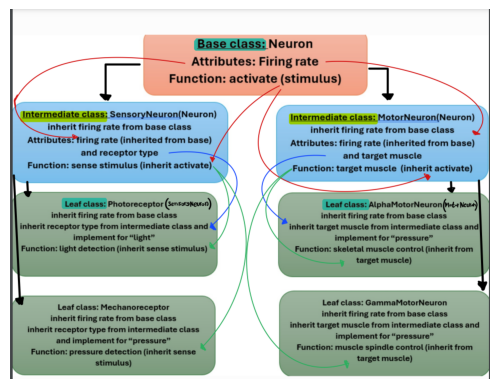

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("Diagram.png")
plt.imshow(img)
plt.axis('off')
plt.show()

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


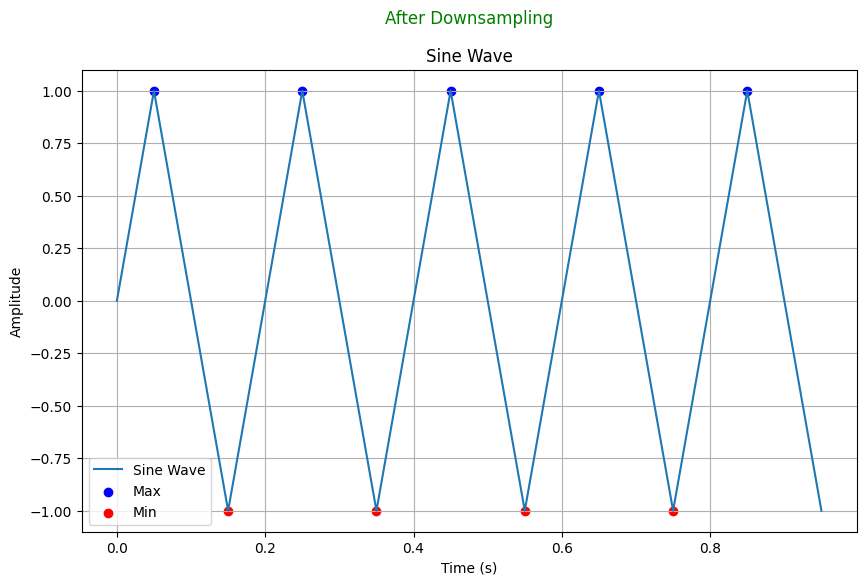

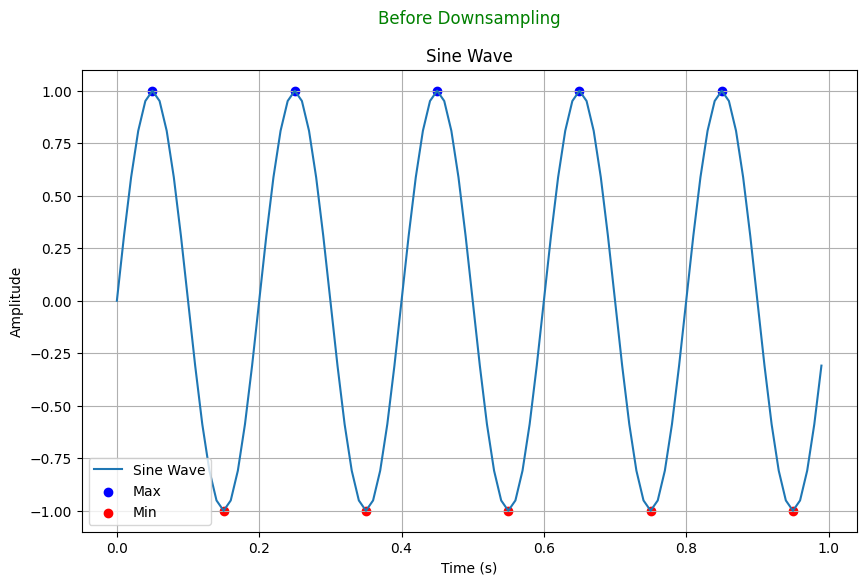

In [5]:
"Part 2 of the Mini Project"
def SinWave (frequency, amplitude, sampling_interval): #function that prepare the sinusodial wave
    time = np.arange(0, 1, sampling_interval)
    signal = amplitude * np.sin(2 * np.pi * frequency * time)
    return signal

def FindMaxMin (signal):
    max = []
    min = []
    for i in range(1, len(signal) - 1):
        if signal[i - 1] < signal[i] > signal[i + 1]:  # Maximum condition
            max.append(i)
        elif signal[i - 1] > signal[i] < signal[i + 1]:  # Minimum condition
            min.append(i)
    return max, min

def ProcessSinWave(signal, sampling_interval, indices, label): #take the sinusodial wave saves and signal and rocess it
    time = indices * sampling_interval
    max, min = FindMaxMin(signal)
    plt.figure(figsize=(10, 6))
    plt.plot(time, signal, label="Sine Wave")
    plt.scatter([time[i] for i in max], [signal[i] for i in max], color='blue', label='Max')
    plt.scatter([time[i] for i in min], [signal[i] for i in min], color='red', label='Min')
    plt.text(0.5, 1.1, label, transform=plt.gca().transAxes, fontsize=12, color='green', ha='center')
    plt.legend()
    plt.title("Sine Wave")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

sampling_interval = 0.01 #for general use in all functions - global constant

signal_raw = SinWave(5,1,sampling_interval) #signal for use in the process function before downsampling
#here i need to define the frequency and the amplitude i want to process

downsampling_ratio = 0.2 #define how much i want to downsample
num_points = int(len(signal_raw) * downsampling_ratio)  #raking all the points in the graph and takes 20% of them


#make constant interval of the 20% left
step = len(signal_raw) // num_points
indices = np.arange(0, len(signal_raw), step)

signal = signal_raw[indices]  #atfer downsampling

downsampling_ratio = 1 #defined 1 to show before the downsampling
num_points = int(len(signal_raw) * downsampling_ratio)
indices_before = np.linspace(0, len(signal_raw) - 1, num_points, dtype=int)
signal_before = signal_raw[indices_before]

print(indices)
ProcessSinWave(signal, sampling_interval, indices, "After Downsampling") #show the plot after the downsampling
ProcessSinWave(signal_before, sampling_interval, indices_before, "Before Downsampling") #show a plot before the downsampling


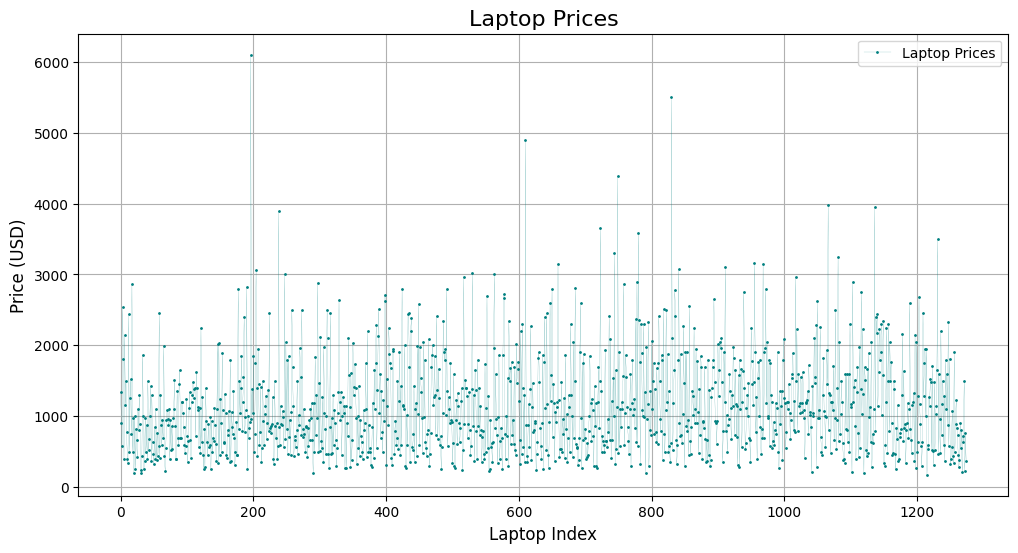

In [6]:
##Laptop Prices
file_path = "laptop_price - dataset.csv"
df = pd.read_csv(file_path) # reading the file using pandas
#print(df.head())

# Plot for prices for all the laptops
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price (Euro)'], color='teal', linestyle='solid',linewidth=0.1,  marker='o', markersize=1, label='Laptop Prices')
plt.title('Laptop Prices', fontsize=16)
plt.xlabel('Laptop Index', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid()
plt.legend()
plt.show()


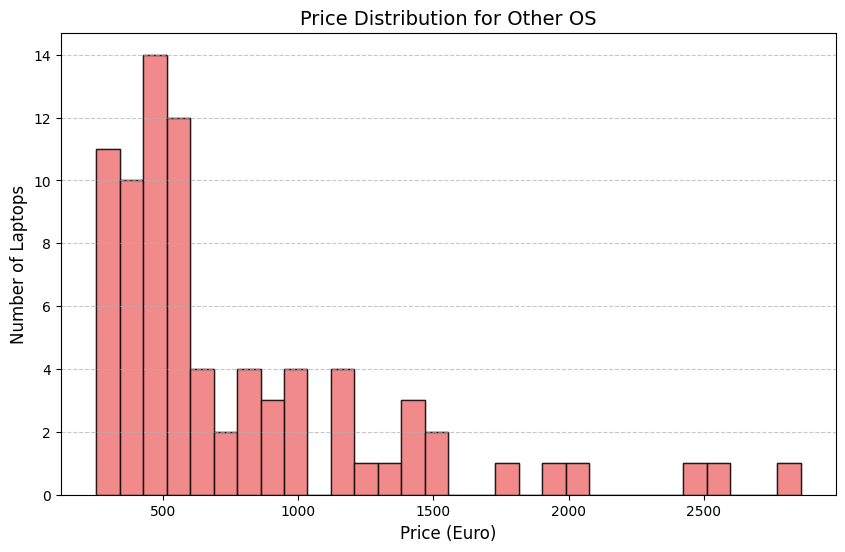

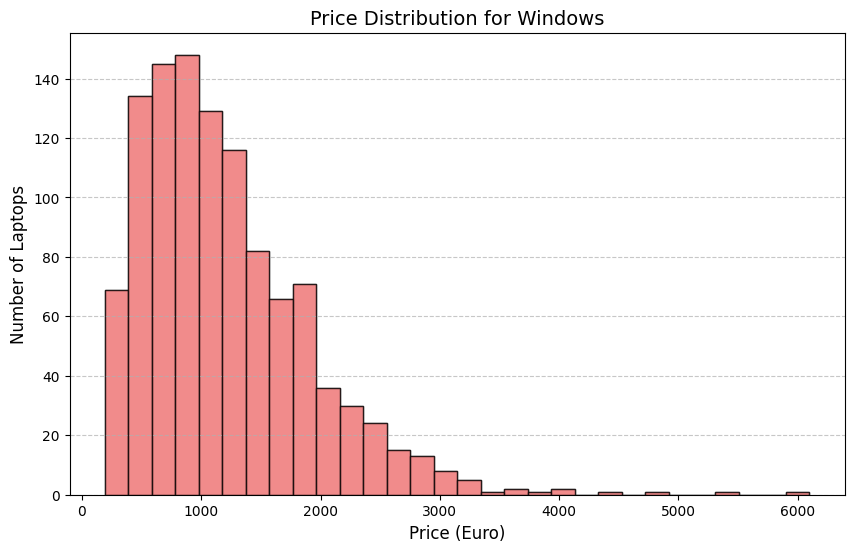

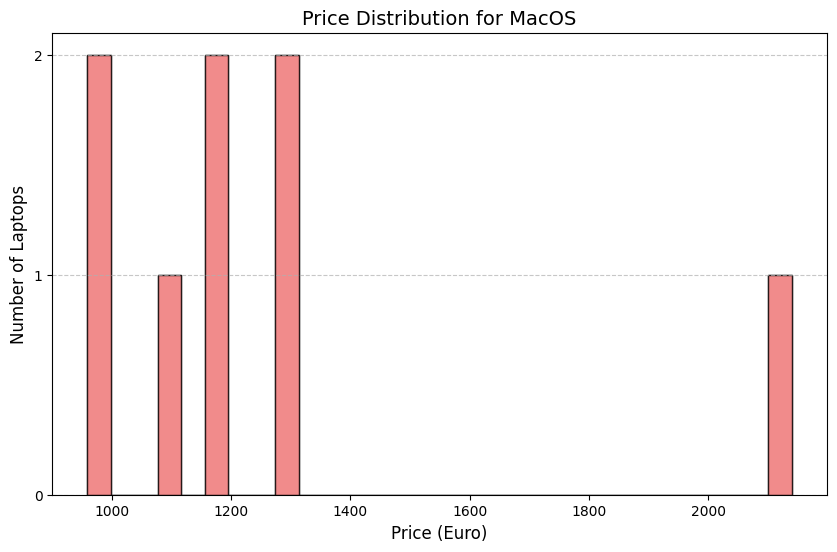

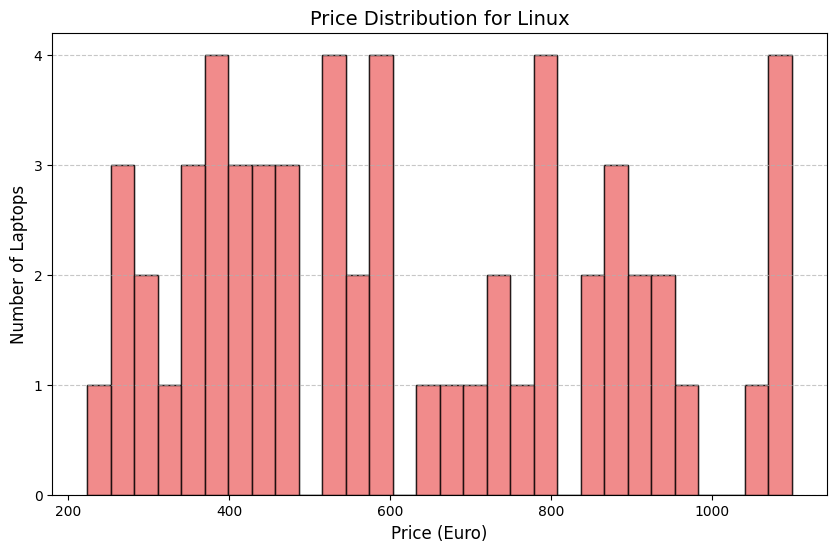

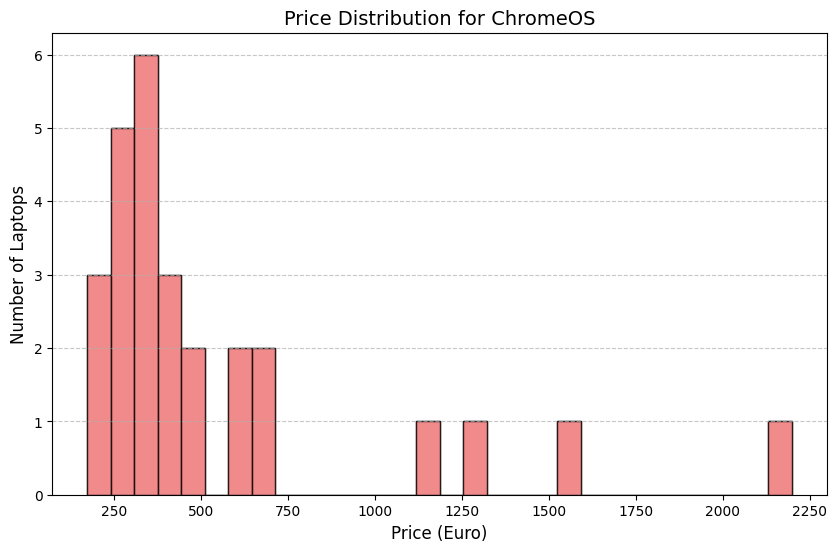

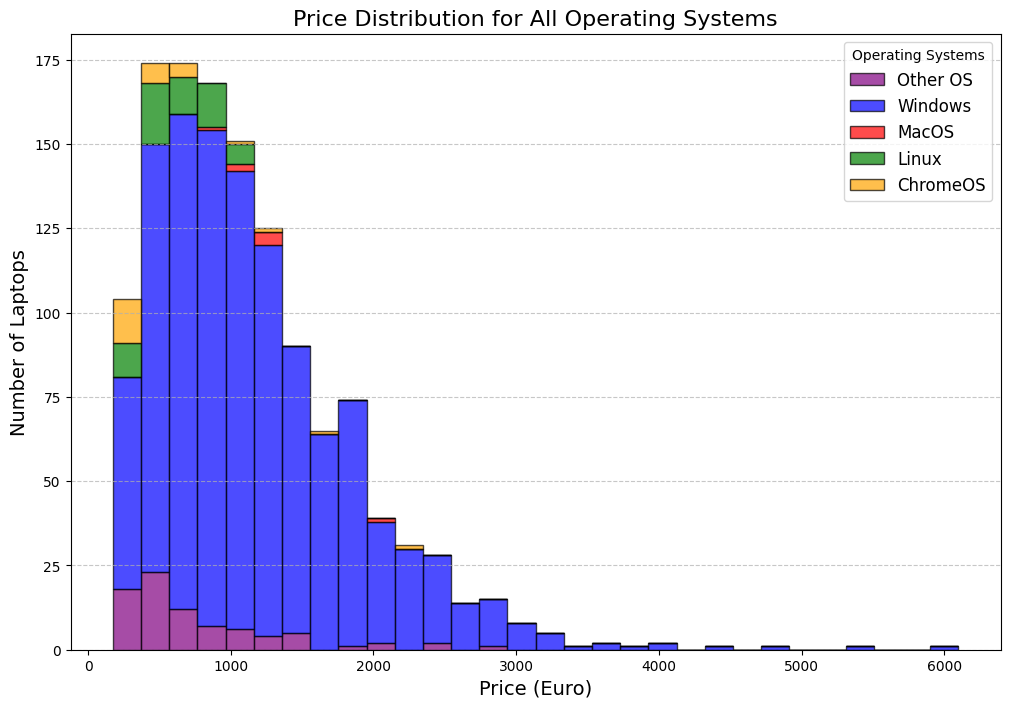

In [14]:
##Laptop Prices bsed on Operating System
file_path = "laptop_price - dataset.csv"
df = pd.read_csv(file_path) # reading the file using pandas
#print(df.head())

# merging the laptops operating systems to groups of their own
def merge_os(os): #os - operating system
    if 'Windows' in os:
        return 'Windows'
    elif 'Mac' in os:
        return 'MacOS'
    elif 'Linux' in os or 'Ubuntu' in os:
        return 'Linux'
    elif 'Chrome' in os:
        return 'ChromeOS'
    else:
        return 'Other OS'

# Update column OpSys
df['Merged_OpSys'] = df['OpSys'].apply(merge_os)

# new plot based on the new column
unique_os = df['Merged_OpSys'].unique()

for os in unique_os:
    plt.figure(figsize=(10, 6))
    subset = df[df['Merged_OpSys'] == os]
    counts, bins, _ = plt.hist(subset['Price (Euro)'], color='lightcoral', bins=30, edgecolor='black', alpha=0.7)
    plt.hist(subset['Price (Euro)'], color='lightcoral', bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Price Distribution for {os}', fontsize=14)
    plt.xlabel('Price (Euro)', fontsize=12)
    plt.ylabel('Number of Laptops', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    if os in ['MacOS', 'Linux']: #only for those two because of the amount differences
        plt.yticks(range(0, int(counts.max()) + 1))
    plt.show()

##make also one plot that contains all tht plot in one
    
plt.figure(figsize=(12, 8))

colors = { 'Windows': 'blue',
            'MacOS': 'red',
            'Linux': 'green',
            'ChromeOS': 'orange',
            'Other OS': 'purple'}

data = [df[df['Merged_OpSys'] == os]['Price (Euro)'] for os in unique_os]
plt.hist(data, bins=30, stacked=True, color=[colors[os] for os in unique_os], edgecolor='black', alpha=0.7, label=unique_os)

plt.title('Price Distribution for All Operating Systems', fontsize=16)
plt.xlabel('Price (Euro)', fontsize=14)
plt.ylabel('Number of Laptops', fontsize=14)
plt.legend(title="Operating Systems", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



The correlation is: 0.7402865271622701


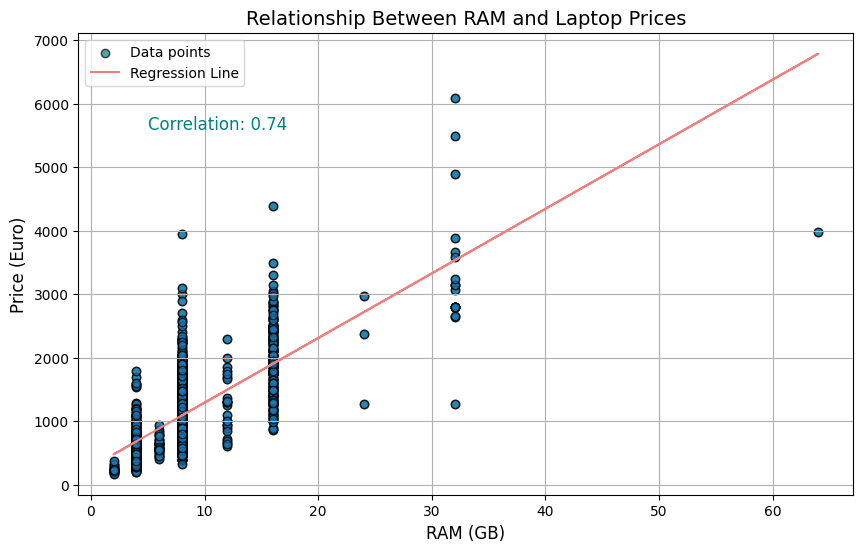

In [22]:
##Laptop Prices bsed on Operating System
file_path = "laptop_price - dataset.csv"
df = pd.read_csv(file_path) # reading the file using pandas
plt.figure(figsize=(10, 6))

#make a scater plot
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], alpha=0.7,c='teal', edgecolors='black', label='Data points')
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], alpha=0.7, edgecolors='black')
plt.title('Relationship Between RAM and Laptop Prices', fontsize=14)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True)

# Calculate the regression line
x = df['RAM (GB)']
y = df['Price (Euro)']
coefficients = np.polyfit(x, y, 1)
regression_line = np.poly1d(coefficients)
plt.plot(x, regression_line(x), color='lightcoral', label='Regression Line')
correlation = df['RAM (GB)'].corr(df['Price (Euro)'])
plt.text(5, max(y) - 500, f"Correlation: {correlation:.2f}", fontsize=12, color='teal')
print(f"The correlation is: {correlation}")

plt.legend()
plt.show()






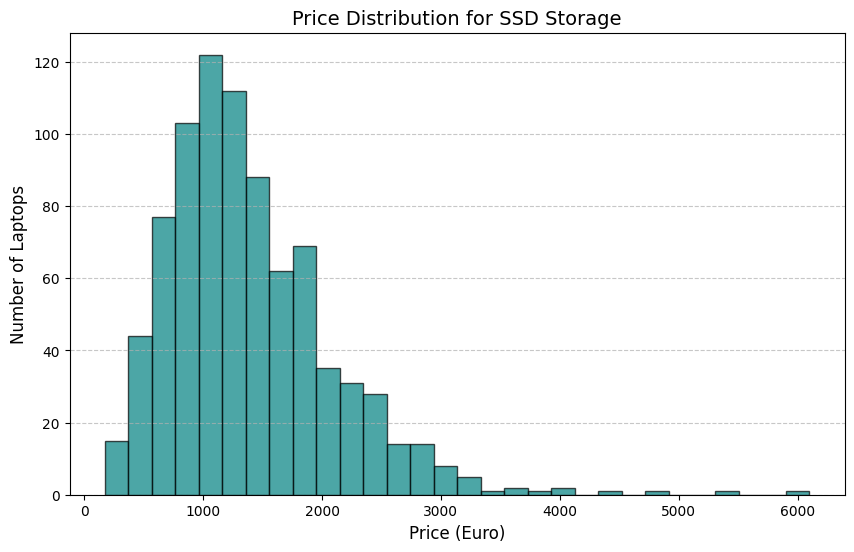

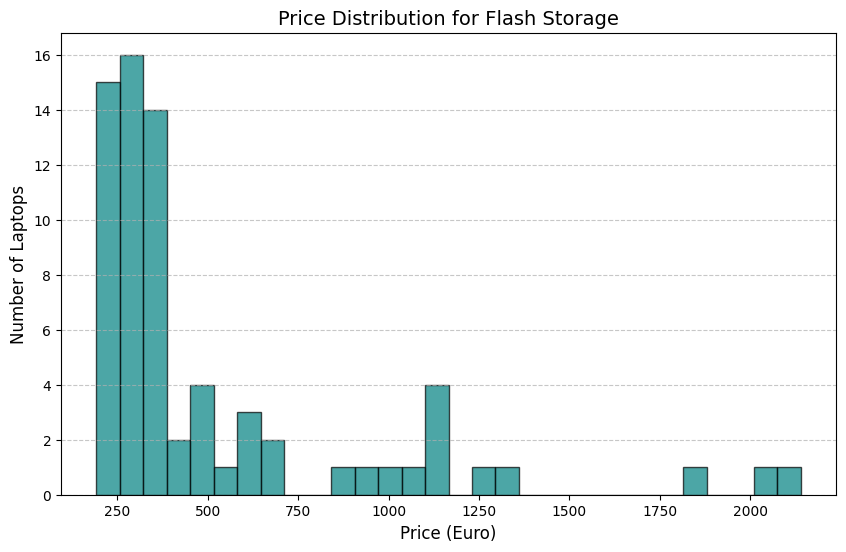

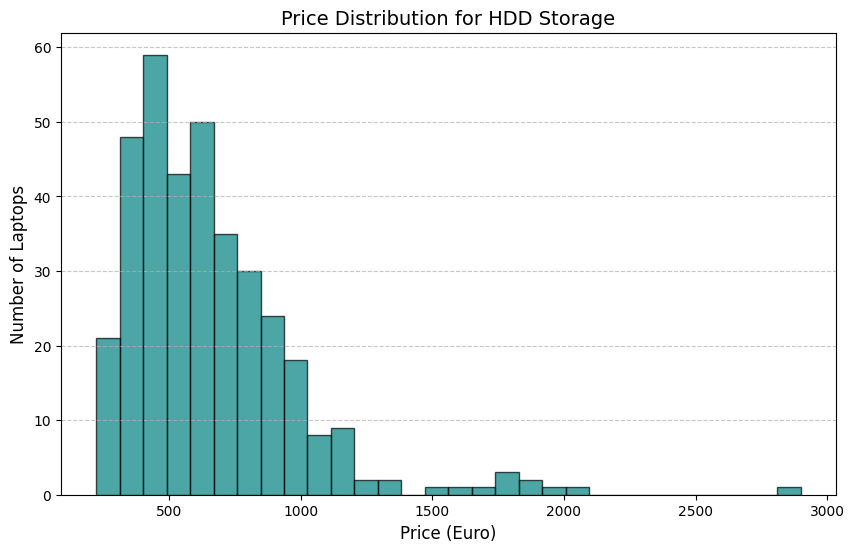

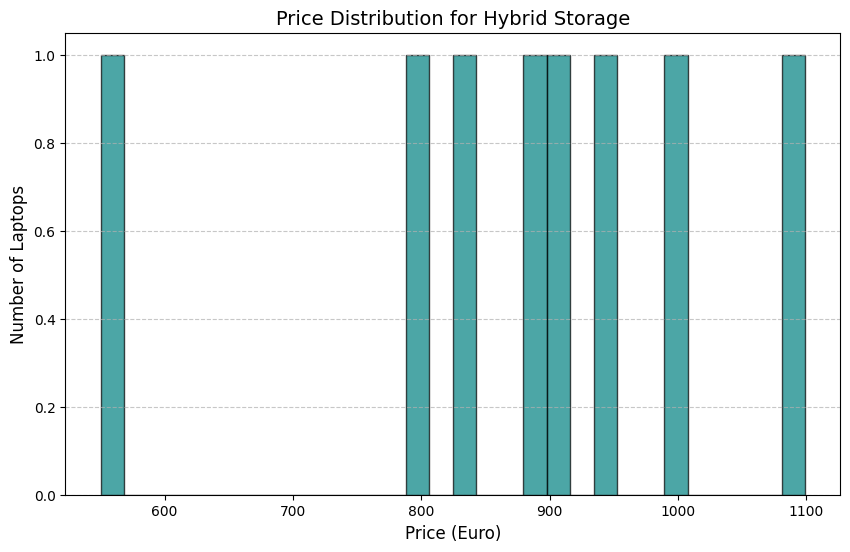

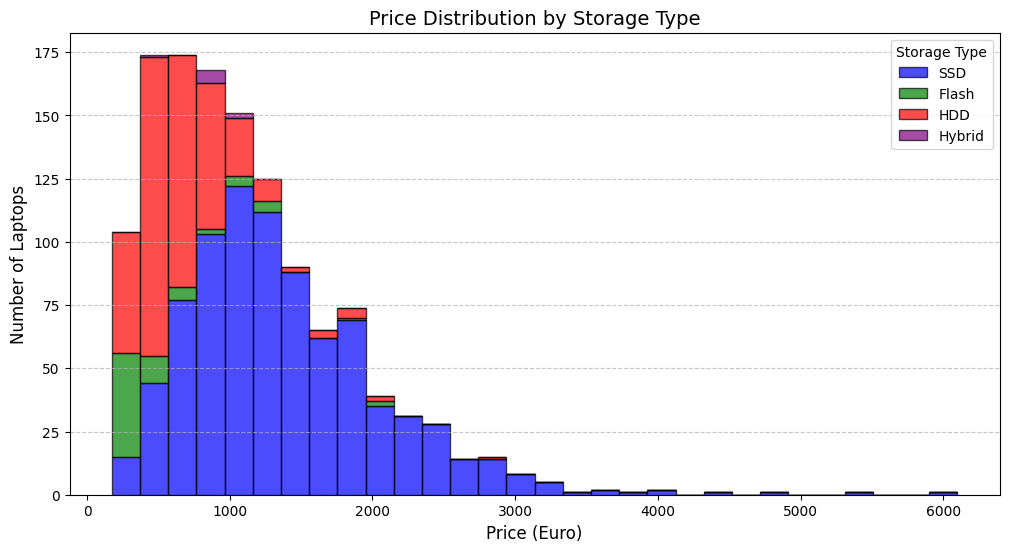

In [ ]:
#price based on storage type
file_path = "laptop_price - dataset.csv"
df = pd.read_csv(file_path) # reading the file using pandas
#New column to make the storage name as required
def extract_storage_type(memory):
    if 'SSD' in memory:
        return 'SSD'
    elif 'HDD' in memory:
        return 'HDD'
    elif 'Hybrid' in memory:
        return 'Hybrid'
    elif 'Flash' in memory:
        return 'Flash'
    else:
        return 'Other'

df['Storage Type'] = df['Memory'].apply(extract_storage_type)

unique_storage_types = df['Storage Type'].unique()

for storage_type in unique_storage_types:
    plt.figure(figsize=(10, 6))
    subset = df[df['Storage Type'] == storage_type]
    plt.hist(subset['Price (Euro)'], bins=30, color="teal", edgecolor='black', alpha=0.7)
    plt.title(f'Price Distribution for {storage_type} Storage', fontsize=14)
    plt.xlabel('Price (Euro)', fontsize=12)
    plt.ylabel('Number of Laptops', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

unique_storage_types = df['Storage Type'].unique()

colors = ['blue', 'green', 'red', 'purple', 'orange']

data = [df[df['Storage Type'] == storage_type]['Price (Euro)'] for storage_type in unique_storage_types]

plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, stacked=True, color=colors[:len(unique_storage_types)], edgecolor='black', label=unique_storage_types, alpha=0.7)
plt.title('Price Distribution by Storage Type', fontsize=14)
plt.xlabel('Price (Euro)', fontsize=12)
plt.ylabel('Number of Laptops', fontsize=12)
plt.legend(title='Storage Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




The correlation is: 0.07


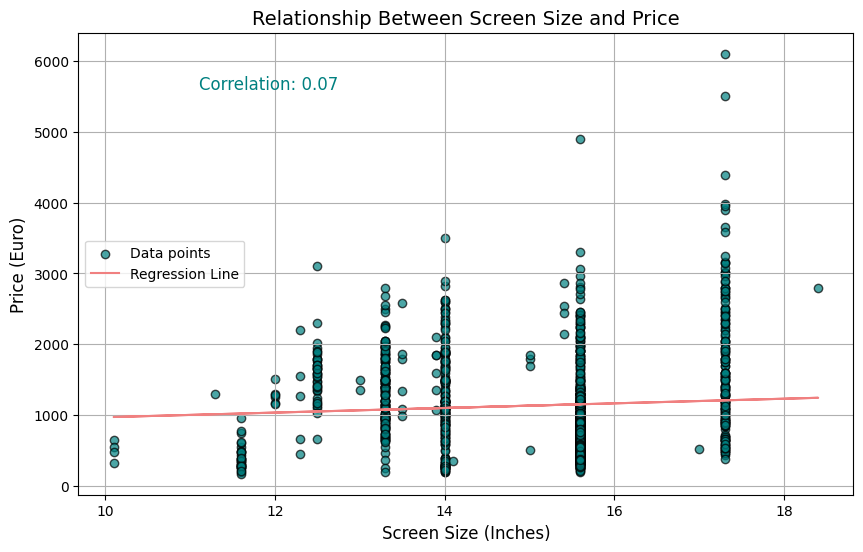

In [ ]:
#Bonus question - find the correlation between inch and price
file_path = "laptop_price - dataset.csv"
df = pd.read_csv(file_path) # reading the file using pandas

if 'Inches' in df.columns and 'Price (Euro)' in df.columns:
    inches = df['Inches'].to_numpy()
    price = df['Price (Euro)'].to_numpy()

    # Calculate the correlation
    correlation = np.corrcoef(inches, price)[0, 1]
    print(f"The correlation is: {correlation:.2f}")

    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(inches, price, alpha=0.7, color='teal', edgecolor='black', label='Data points')

    # Add a regression line
    coefficients = np.polyfit(inches, price, 1)  # Linear regression
    regression_line = np.poly1d(coefficients)
    plt.plot(inches, regression_line(inches), color='lightcoral', label='Regression Line')

    # Add labels and title
    plt.title('Relationship Between Screen Size and Price', fontsize=14)
    plt.xlabel('Screen Size (Inches)', fontsize=12)
    plt.ylabel('Price (Euro)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.text(min(inches) + 1, max(price) - 500, f"Correlation: {correlation:.2f}", fontsize=12, color='teal')
    plt.show()
else:
    print("The required columns 'Inches' and 'Price (Euro)' are not present in the dataset.")
